In [1]:
import requests
import pandas as pd
import datetime
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
date_from = '2021-08-01'
date_to = str(datetime.date.today())

req_url = f'https://leadgid.api.hasoffers.com/Apiv3/json?api_key=4dc79c63460150a918972cf84c9c4557ff0d063b1252d267fe50f9fcb5abf127&Target=Affiliate_Report&Method=getStats&fields[]=Stat.date&fields[]=Stat.affiliate_info3&fields[]=Stat.affiliate_info2&fields[]=Stat.affiliate_info1&fields[]=Stat.payout&fields[]=Stat.clicks&fields[]=Stat.offer_id&fields[]=Offer.name&filters[Stat.date][conditional]=BETWEEN&filters[Stat.date][values][]={date_from}&filters[Stat.date][values][]={date_to}&limit=5000'
req = requests.get(req_url).json()

In [3]:
conversion_list = []
columns = ['date', 'offer_name', 'offer_id', 'sub1', 'sub2', 'sub3', 'payout', 'clicks']

for item in req['response']['data']['data']:
    date = item['Stat']['date']
    offer_name = item['Offer']['name']
    offer_id = item['Stat']['offer_id']
    sub1 = item['Stat']['affiliate_info1']
    sub2 = item['Stat']['affiliate_info2']
    sub3 = item['Stat']['affiliate_info3']
    payout = item['Stat']['payout']
    clicks = item['Stat']['clicks']

    conversion_list.append([date, offer_name, offer_id, sub1, sub2, sub3, payout, clicks])

In [4]:
# conversion_list

In [5]:
df = pd.DataFrame(columns=columns, data=conversion_list)
df['date'] = pd.to_datetime(df['date'])
df['payout'] = pd.to_numeric(df['payout'])
df['clicks'] = df['clicks'].astype('int')
df['EPC'] = (df['payout'] / df['clicks']).round(2)
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df.head()

,date,offer_name,offer_id,sub1,sub2,sub3,payout,clicks,EPC,week,month
0,2021-08-01,VIVA деньги - онлайн выдача,5141,ppp,,,19200.0,475,40.42,30,8
1,2021-08-01,ТУРБОЗАЙМ - Выданный займ,2577,sm,,,11250.0,125,90.00,30,8
2,2021-08-01,Webbankir - выданный заём,3127,sm,,,5850.0,194,30.15,30,8
3,2021-08-01,Credit7 - выдача,4470,sm,,,6600.0,309,21.36,30,8
4,2021-08-01,BelkaCredit - выдача,4472,sm,,,5760.0,181,31.82,30,8


In [6]:
ppp = df.query('sub1 == "sm" & sub2 == "d0q1"')

In [7]:
# ppp = ppp.groupby(by=['date', 'offer_id']).agg({'clicks': 'sum', 'payout': 'sum'}).reset_index()
# ppp

ppp = ppp.pivot_table(index='date', columns='sub3', values='payout', aggfunc='sum', fill_value=0)
ppp['total_ckeck'] = ppp['kapusta_check'] + ppp['moneyman_check'] + ppp['vivus_check'] + ppp['webbankir_check']
ppp.tail(10)

sub3,kapusta_check,moneyman_check,random,vivus_check,webbankir_check,total_ckeck
date,,,,,,
2021-11-05,10250,14800,21680,5600,19200,49850
2021-11-06,16400,29600,36100,4160,16000,66160
2021-11-07,14350,17760,53300,2800,12800,47710
2021-11-08,20500,17760,28850,0,22400,60660
2021-11-09,18450,23680,57290,1360,12800,56290
2021-11-10,16400,14800,33440,5520,16000,52720
2021-11-11,14350,5920,32280,20800,6400,47470
2021-11-12,8200,23680,39190,9760,6400,48040
2021-11-13,10250,20720,18110,14000,12800,57770


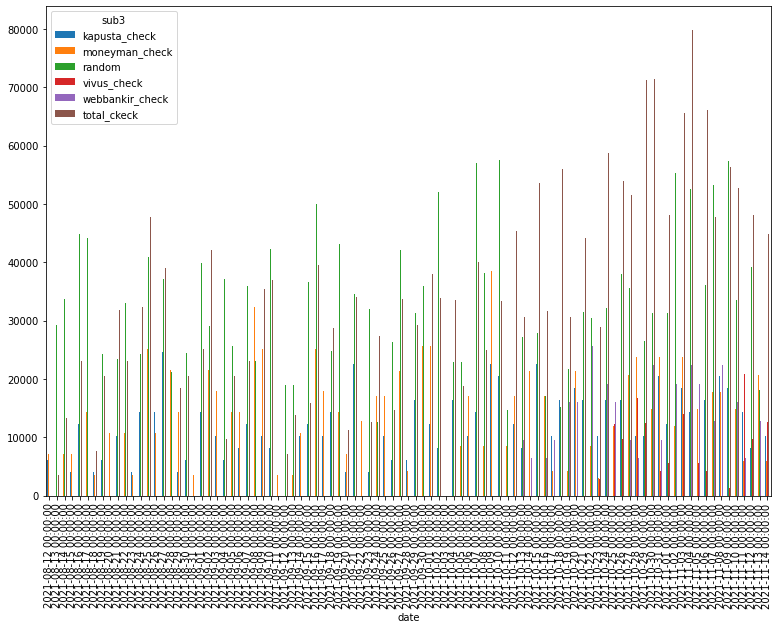

In [8]:
ppp.plot(kind='bar', figsize=(13, 9));

In [9]:
overall_data = df.pivot_table(index='date', columns='sub1', 
                              values='payout', aggfunc='sum', 
                              fill_value='0', margins=True)

overall_data.sort_values(by='All', axis=1, ascending=False).tail(10)

sub1,All,sm,ppp,,eml,sitbz,sm1,ads,d1q1
date,,,,,,,,,
2021-11-06 00:00:00,197490.0,148090.0,49400.0,0,0,0,0,0,0
2021-11-07 00:00:00,188125.0,140925.0,47200.0,0,0,0,0,0,0
2021-11-08 00:00:00,176120.0,130520.0,45600.0,0,0.0,0,0,0,0
2021-11-09 00:00:00,204160.0,177560.0,26600.0,0,0,0,0,0,0
2021-11-10 00:00:00,159210.0,140210.0,19000.0,0,0,0,0,0,0
2021-11-11 00:00:00,142350.0,119550.0,22800.0,0,0,0,0,0,0
2021-11-12 00:00:00,179780.0,136390.0,43390.0,0,0,0,0,0,0
2021-11-13 00:00:00,157440.0,115340.0,42100.0,0,0.0,0,0,0,0
2021-11-14 00:00:00,115640.0,81440.0,34200.0,0,0,0,0,0,0


In [10]:
df

,date,offer_name,offer_id,sub1,sub2,sub3,payout,clicks,EPC,week,month
0,2021-08-01,VIVA деньги - онлайн выдача,5141,ppp,,,19200.0,475,40.42,30,8
1,2021-08-01,ТУРБОЗАЙМ - Выданный займ,2577,sm,,,11250.0,125,90.00,30,8
2,2021-08-01,Webbankir - выданный заём,3127,sm,,,5850.0,194,30.15,30,8
3,2021-08-01,Credit7 - выдача,4470,sm,,,6600.0,309,21.36,30,8
4,2021-08-01,BelkaCredit - выдача,4472,sm,,,5760.0,181,31.82,30,8
...,...,...,...,...,...,...,...,...,...,...,...
2307,2021-11-14,Webbankir - выданный заём,3127,sm,d1q2,vitrina_lk,0.0,1,0.00,45,11
2308,2021-11-14,BelkaCredit - выдача,4472,sm,d1q2,vitrina_lk,0.0,2,0.00,45,11
2309,2021-11-14,Moneyman - Выдача новому клиенту (VIP),5024,sm,d1q2,vitrina_lk,0.0,2,0.00,45,11
2310,2021-11-14,Vivus - Выдача,1782,sm,d0q1,vivus_check,12630.0,113,111.77,45,11


In [11]:
ppp = df.query('sub1 == "ppp"').groupby(by=['date', 'offer_id']).agg({'clicks': 'sum', 'payout': 'sum'}).reset_index()
ppp = ppp.pivot_table(index='date', columns='offer_id', values=['clicks', 'payout'], aggfunc='sum', fill_value=0)
ppp.tail(10)

clicks           payout            
offer_id     2577 5141 5220   2577   5141 5220
date                                          
2021-11-05      0  758    0  12300  76000    0
2021-11-06      0  795    0      0  49400    0
2021-11-07      0  836    0   9200  38000    0
2021-11-08      1  791    0      0  45600    0
2021-11-09      1  714    0      0  26600    0
2021-11-10      0  518    0      0  19000    0
2021-11-11      0  658    0      0  22800    0
2021-11-12      0  624    0   1590  41800    0
2021-11-13      0  668    0   4100  38000    0
2021-11-14      0  524    0      0  34200    0

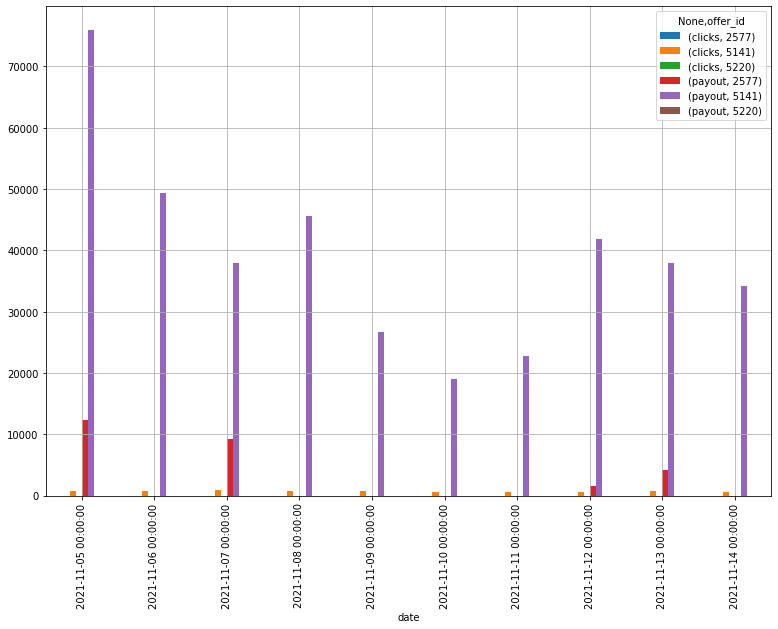

In [12]:
ppp.tail(10).plot(kind='bar', figsize=(13, 9), grid=True);